<hr style="border-top:10px groove PaleTurquoise; margin-top: 2px; margin-bottom: 2px">

In [51]:
# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt
import os
from sklearn.cluster import KMeans
import requests
import json
import time
from scipy.stats import spearmanr

# Vis Imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import register_matplotlib_converters


# Modeling Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm

In [2]:
df=pd.read_csv("cancer_reg.csv", encoding='latin-1')

In [3]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [5]:
df.shape

(3047, 34)

In [6]:
df['PctSomeCol18_24'] = 100 - (df['PctNoHS18_24'] + df['PctHS18_24'] + df['PctBachDeg18_24'])

In [7]:
df['PctPrivateCoverageAlone'] =  df['PctPrivateCoverageAlone'].fillna(100 - (df['PctEmpPrivCoverage'] + df['PctPublicCoverageAlone']))



In [8]:
df.MedianAge.max()

624.0

In [9]:
df.MedianAge.sort_values(ascending=False).head(30)

318     624.0
606     619.2
1579    579.6
225     546.0
1855    536.4
1312    535.2
1744    525.6
2000    523.2
1767    519.6
2835    511.2
2966    508.8
425     508.8
1725    502.8
2589    501.6
2422    500.4
2895    498.0
637     498.0
1736    496.8
2668    496.8
991     481.2
2108    470.4
181     469.2
100     458.4
2132    430.8
2431    429.6
1199    424.8
2391    414.0
843     412.8
1406    406.8
2789    349.2
Name: MedianAge, dtype: float64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgDeathsPerYear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
TARGET_deathRate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidenceRate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medIncome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popEst2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertyPercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studyPerCap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
MedianAge,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
MedianAgeMale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01


In [11]:
df['AvgHouseholdSize'].where(df['AvgHouseholdSize'] >= 1, 1, inplace=True)

In [12]:
# train/validate/test split
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [13]:
x = train['PctEmployed16_Over'].mean()

In [14]:
df['PctEmployed16_Over'] =  df['PctEmployed16_Over'].fillna(x)

In [15]:
avg_age = round(train.MedianAge.mean())
avg_age_male = round(train.MedianAgeMale.mean())
avg_age_female = round(train.MedianAgeFemale.mean())

In [16]:
df['MedianAgeMale'].where(df['MedianAgeMale'] <= 100, avg_age_male, inplace=True)
df['MedianAgeFemale'].where(df['MedianAgeFemale'] <= 100, avg_age_female, inplace=True)
df['MedianAge'].where(df['MedianAge'] <= 100, avg_age, inplace=True)

In [17]:
df.MedianAge.describe()

count    3047.000000
mean       40.874828
std         5.196479
min        22.300000
25%        37.700000
50%        41.000000
75%        44.000000
max        65.300000
Name: MedianAge, dtype: float64

In [18]:
df['AgeBin'] = pd.qcut(df.MedianAge, 3, labels=['young', 'mid-agged', 'old'])


In [160]:
df.shape

(3047, 35)

In [19]:
# train/validate/test split
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

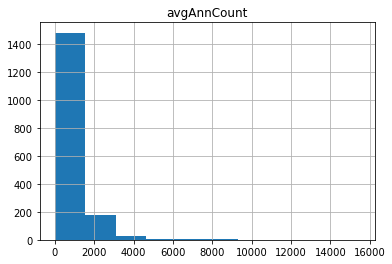

1962.667684    122
22.000000       13
27.000000       12
98.000000       11
43.000000       10
              ... 
2015.000000      1
895.000000       1
1038.000000      1
2573.000000      1
799.000000       1
Name: avgAnnCount, Length: 653, dtype: int64
1962.667684    7.155425
22.000000      0.762463
27.000000      0.703812
98.000000      0.645161
43.000000      0.586510
                 ...   
2015.000000    0.058651
895.000000     0.058651
1038.000000    0.058651
2573.000000    0.058651
799.000000     0.058651
Name: avgAnnCount, Length: 653, dtype: float64


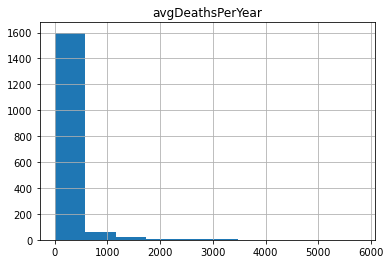

24      23
13      22
11      22
7       21
16      21
        ..
202      1
248      1
1155     1
662      1
510      1
Name: avgDeathsPerYear, Length: 444, dtype: int64
24      1.348974
13      1.290323
11      1.290323
7       1.231672
16      1.231672
          ...   
202     0.058651
248     0.058651
1155    0.058651
662     0.058651
510     0.058651
Name: avgDeathsPerYear, Length: 444, dtype: float64


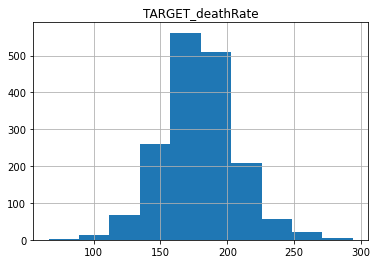

182.8    8
153.9    8
179.9    7
169.9    6
190.0    6
        ..
166.6    1
153.1    1
230.5    1
215.1    1
202.1    1
Name: TARGET_deathRate, Length: 839, dtype: int64
182.8    0.469208
153.9    0.469208
179.9    0.410557
169.9    0.351906
190.0    0.351906
           ...   
166.6    0.058651
153.1    0.058651
230.5    0.058651
215.1    0.058651
202.1    0.058651
Name: TARGET_deathRate, Length: 839, dtype: float64


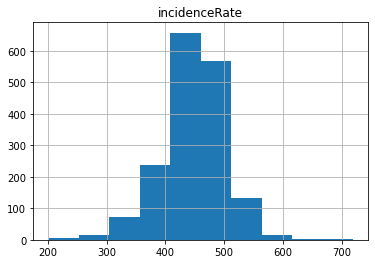

453.549422    122
430.400000      6
444.500000      5
463.700000      5
412.700000      4
             ... 
431.400000      1
341.600000      1
510.800000      1
467.100000      1
459.300000      1
Name: incidenceRate, Length: 1064, dtype: int64
453.549422    7.155425
430.400000    0.351906
444.500000    0.293255
463.700000    0.293255
412.700000    0.234604
                ...   
431.400000    0.058651
341.600000    0.058651
510.800000    0.058651
467.100000    0.058651
459.300000    0.058651
Name: incidenceRate, Length: 1064, dtype: float64


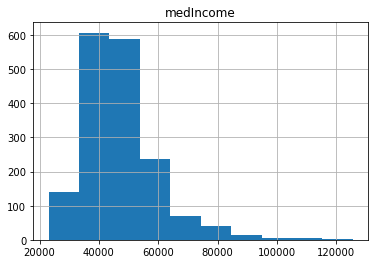

48368    3
36886    2
43509    2
39444    2
42839    2
        ..
41035    1
58268    1
67083    1
49400    1
47092    1
Name: medIncome, Length: 1665, dtype: int64
48368    0.175953
36886    0.117302
43509    0.117302
39444    0.117302
42839    0.117302
           ...   
41035    0.058651
58268    0.058651
67083    0.058651
49400    0.058651
47092    0.058651
Name: medIncome, Length: 1665, dtype: float64


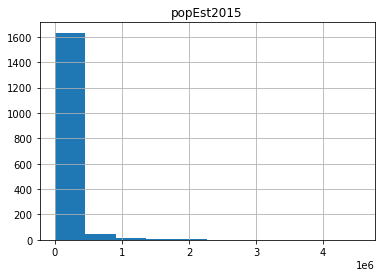

4854     2
13170    2
12841    2
59660    2
33347    2
        ..
23154    1
29724    1
53221    1
29991    1
7032     1
Name: popEst2015, Length: 1694, dtype: int64
4854     0.117302
13170    0.117302
12841    0.117302
59660    0.117302
33347    0.117302
           ...   
23154    0.058651
29724    0.058651
53221    0.058651
29991    0.058651
7032     0.058651
Name: popEst2015, Length: 1694, dtype: float64


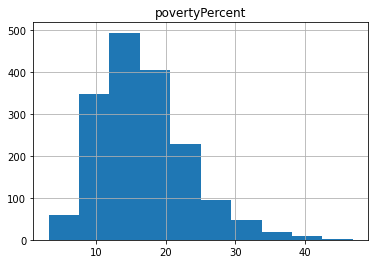

14.7    19
11.5    19
18.0    18
10.0    18
13.0    17
        ..
34.9     1
38.9     1
38.5     1
30.1     1
27.7     1
Name: povertyPercent, Length: 301, dtype: int64
14.7    1.114370
11.5    1.114370
18.0    1.055718
10.0    1.055718
13.0    0.997067
          ...   
34.9    0.058651
38.9    0.058651
38.5    0.058651
30.1    0.058651
27.7    0.058651
Name: povertyPercent, Length: 301, dtype: float64


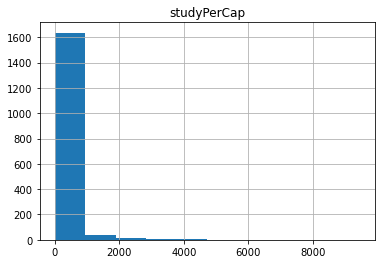

0.000000       1072
93.274881         1
28.812631         1
1390.637626       1
988.379858        1
               ... 
199.729256        1
427.748432        1
113.525633        1
225.682690        1
111.995147        1
Name: studyPerCap, Length: 634, dtype: int64
0.000000       62.873900
93.274881       0.058651
28.812631       0.058651
1390.637626     0.058651
988.379858      0.058651
                 ...    
199.729256      0.058651
427.748432      0.058651
113.525633      0.058651
225.682690      0.058651
111.995147      0.058651
Name: studyPerCap, Length: 634, dtype: float64


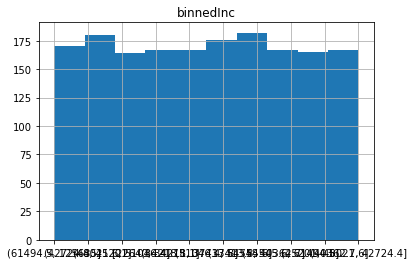

(37413.8, 40362.7]    182
(42724.4, 45201]      180
(51046.4, 54545.6]    176
(61494.5, 125635]     170
[22640, 34218.1]      167
(34218.1, 37413.8]    167
(54545.6, 61494.5]    167
(40362.7, 42724.4]    167
(45201, 48021.6]      165
(48021.6, 51046.4]    164
Name: binnedInc, dtype: int64
(37413.8, 40362.7]    10.674487
(42724.4, 45201]      10.557185
(51046.4, 54545.6]    10.322581
(61494.5, 125635]      9.970674
[22640, 34218.1]       9.794721
(34218.1, 37413.8]     9.794721
(54545.6, 61494.5]     9.794721
(40362.7, 42724.4]     9.794721
(45201, 48021.6]       9.677419
(48021.6, 51046.4]     9.618768
Name: binnedInc, dtype: float64


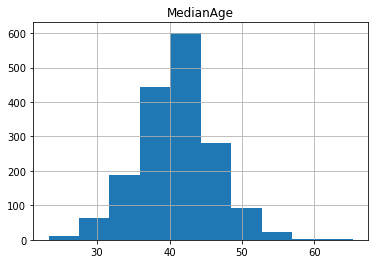

46.0    27
40.7    22
41.0    22
41.7    21
40.1    21
        ..
25.0     1
59.0     1
28.0     1
31.0     1
51.0     1
Name: MedianAge, Length: 262, dtype: int64
46.0    1.583578
40.7    1.290323
41.0    1.290323
41.7    1.231672
40.1    1.231672
          ...   
25.0    0.058651
59.0    0.058651
28.0    0.058651
31.0    0.058651
51.0    0.058651
Name: MedianAge, Length: 262, dtype: float64


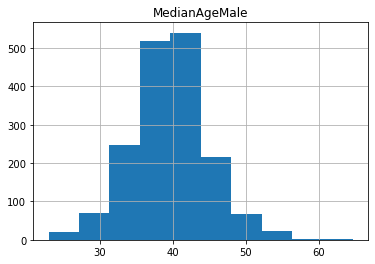

39.2    23
40.8    23
40.4    23
40.3    22
38.2    22
        ..
47.3     1
23.0     1
48.6     1
25.0     1
50.9     1
Name: MedianAgeMale, Length: 270, dtype: int64
39.2    1.348974
40.8    1.348974
40.4    1.348974
40.3    1.290323
38.2    1.290323
          ...   
47.3    0.058651
23.0    0.058651
48.6    0.058651
25.0    0.058651
50.9    0.058651
Name: MedianAgeMale, Length: 270, dtype: float64


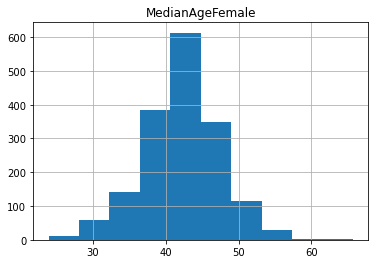

42.9    23
44.0    21
42.8    20
40.8    20
42.2    19
        ..
53.5     1
58.7     1
56.7     1
65.7     1
52.6     1
Name: MedianAgeFemale, Length: 266, dtype: int64
42.9    1.348974
44.0    1.231672
42.8    1.173021
40.8    1.173021
42.2    1.114370
          ...   
53.5    0.058651
58.7    0.058651
56.7    0.058651
65.7    0.058651
52.6    0.058651
Name: MedianAgeFemale, Length: 266, dtype: float64


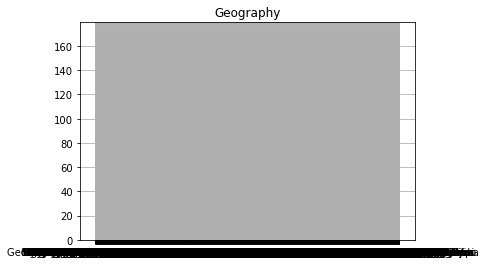

Boone County, Kentucky         1
Dundy County, Nebraska         1
Lewis County, Idaho            1
Curry County, Oregon           1
Madison County, Mississippi    1
                              ..
Antrim County, Michigan        1
Carroll County, Virginia       1
Pulaski County, Missouri       1
Franklin County, Maine         1
Schuyler County, Illinois      1
Name: Geography, Length: 1705, dtype: int64
Boone County, Kentucky         0.058651
Dundy County, Nebraska         0.058651
Lewis County, Idaho            0.058651
Curry County, Oregon           0.058651
Madison County, Mississippi    0.058651
                                 ...   
Antrim County, Michigan        0.058651
Carroll County, Virginia       0.058651
Pulaski County, Missouri       0.058651
Franklin County, Maine         0.058651
Schuyler County, Illinois      0.058651
Name: Geography, Length: 1705, dtype: float64


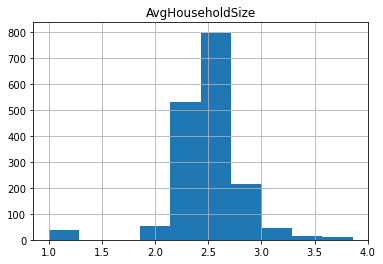

2.48    47
2.55    40
2.38    39
1.00    39
2.52    38
        ..
3.30     1
3.28     1
3.51     1
3.75     1
2.04     1
Name: AvgHouseholdSize, Length: 145, dtype: int64
2.48    2.756598
2.55    2.346041
2.38    2.287390
1.00    2.287390
2.52    2.228739
          ...   
3.30    0.058651
3.28    0.058651
3.51    0.058651
3.75    0.058651
2.04    0.058651
Name: AvgHouseholdSize, Length: 145, dtype: float64


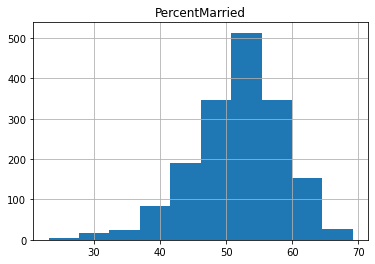

52.2    18
54.4    17
51.1    17
53.5    17
53.3    16
        ..
28.9     1
27.8     1
65.4     1
36.1     1
30.0     1
Name: PercentMarried, Length: 318, dtype: int64
52.2    1.055718
54.4    0.997067
51.1    0.997067
53.5    0.997067
53.3    0.938416
          ...   
28.9    0.058651
27.8    0.058651
65.4    0.058651
36.1    0.058651
30.0    0.058651
Name: PercentMarried, Length: 318, dtype: float64


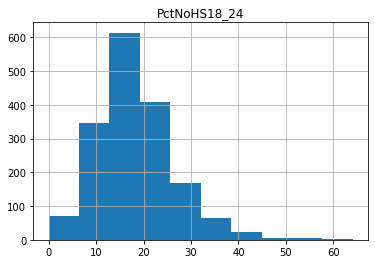

13.6    16
15.0    15
14.0    15
14.7    15
20.9    15
        ..
35.3     1
1.2      1
32.3     1
2.5      1
42.0     1
Name: PctNoHS18_24, Length: 360, dtype: int64
13.6    0.938416
15.0    0.879765
14.0    0.879765
14.7    0.879765
20.9    0.879765
          ...   
35.3    0.058651
1.2     0.058651
32.3    0.058651
2.5     0.058651
42.0    0.058651
Name: PctNoHS18_24, Length: 360, dtype: float64


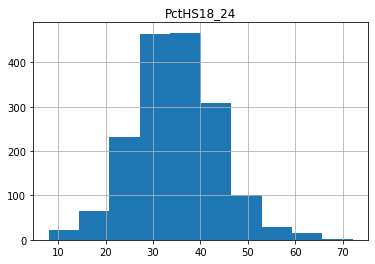

31.3    14
36.6    14
33.2    13
32.1    13
39.2    13
        ..
53.8     1
20.6     1
53.0     1
65.5     1
11.6     1
Name: PctHS18_24, Length: 404, dtype: int64
31.3    0.821114
36.6    0.821114
33.2    0.762463
32.1    0.762463
39.2    0.762463
          ...   
53.8    0.058651
20.6    0.058651
53.0    0.058651
65.5    0.058651
11.6    0.058651
Name: PctHS18_24, Length: 404, dtype: float64


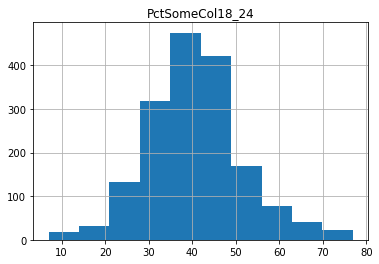

40.5    10
34.5    10
45.7    10
35.3     9
33.9     9
        ..
59.6     1
48.1     1
42.9     1
55.3     1
59.9     1
Name: PctSomeCol18_24, Length: 701, dtype: int64
40.5    0.586510
34.5    0.586510
45.7    0.586510
35.3    0.527859
33.9    0.527859
          ...   
59.6    0.058651
48.1    0.058651
42.9    0.058651
55.3    0.058651
59.9    0.058651
Name: PctSomeCol18_24, Length: 701, dtype: float64


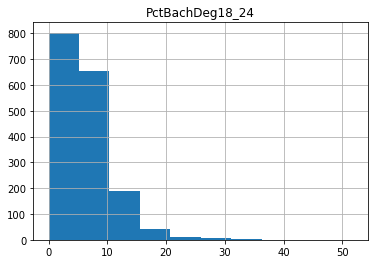

0.0     66
4.7     29
6.1     26
5.7     25
5.3     24
        ..
18.7     1
15.9     1
16.1     1
27.4     1
30.4     1
Name: PctBachDeg18_24, Length: 202, dtype: int64
0.0     3.870968
4.7     1.700880
6.1     1.524927
5.7     1.466276
5.3     1.407625
          ...   
18.7    0.058651
15.9    0.058651
16.1    0.058651
27.4    0.058651
30.4    0.058651
Name: PctBachDeg18_24, Length: 202, dtype: float64


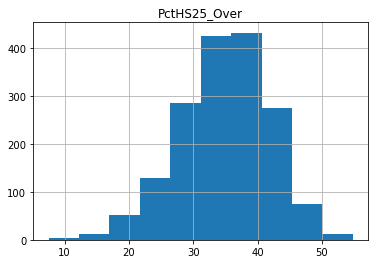

35.6    16
39.2    15
36.4    15
34.3    15
33.7    14
        ..
19.5     1
52.1     1
10.8     1
49.6     1
17.3     1
Name: PctHS25_Over, Length: 322, dtype: int64
35.6    0.938416
39.2    0.879765
36.4    0.879765
34.3    0.879765
33.7    0.821114
          ...   
19.5    0.058651
52.1    0.058651
10.8    0.058651
49.6    0.058651
17.3    0.058651
Name: PctHS25_Over, Length: 322, dtype: float64


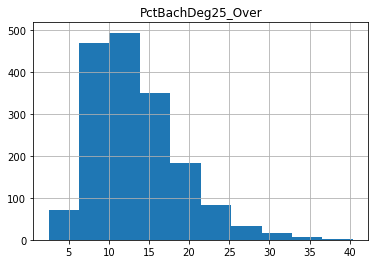

9.8     25
10.0    23
8.2     21
11.5    21
9.0     20
        ..
24.8     1
26.2     1
40.4     1
34.5     1
39.7     1
Name: PctBachDeg25_Over, Length: 253, dtype: int64
9.8     1.466276
10.0    1.348974
8.2     1.231672
11.5    1.231672
9.0     1.173021
          ...   
24.8    0.058651
26.2    0.058651
40.4    0.058651
34.5    0.058651
39.7    0.058651
Name: PctBachDeg25_Over, Length: 253, dtype: float64


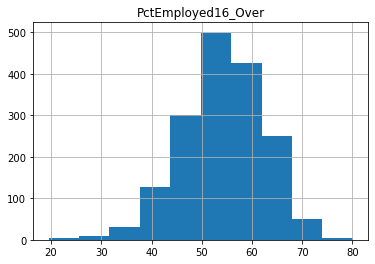

54.255179    83
57.900000    15
57.700000    13
59.900000    13
58.700000    12
             ..
30.900000     1
36.800000     1
33.100000     1
49.900000     1
70.600000     1
Name: PctEmployed16_Over, Length: 368, dtype: int64
54.255179    4.868035
57.900000    0.879765
57.700000    0.762463
59.900000    0.762463
58.700000    0.703812
               ...   
30.900000    0.058651
36.800000    0.058651
33.100000    0.058651
49.900000    0.058651
70.600000    0.058651
Name: PctEmployed16_Over, Length: 368, dtype: float64


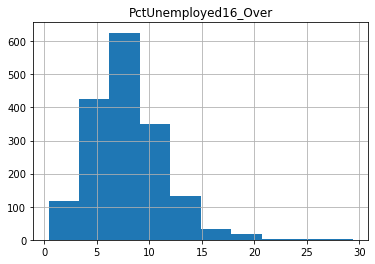

7.9     34
9.0     30
7.2     29
6.8     29
8.4     27
        ..
17.4     1
15.8     1
20.1     1
27.0     1
19.9     1
Name: PctUnemployed16_Over, Length: 179, dtype: int64
7.9     1.994135
9.0     1.759531
7.2     1.700880
6.8     1.700880
8.4     1.583578
          ...   
17.4    0.058651
15.8    0.058651
20.1    0.058651
27.0    0.058651
19.9    0.058651
Name: PctUnemployed16_Over, Length: 179, dtype: float64


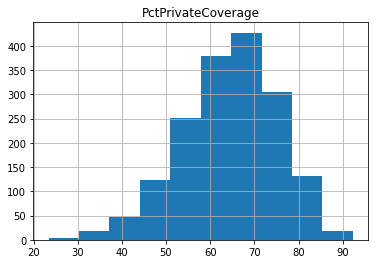

68.1    14
61.7    12
64.3    12
59.8    12
69.1    12
        ..
43.3     1
57.6     1
52.6     1
36.5     1
29.9     1
Name: PctPrivateCoverage, Length: 448, dtype: int64
68.1    0.821114
61.7    0.703812
64.3    0.703812
59.8    0.703812
69.1    0.703812
          ...   
43.3    0.058651
57.6    0.058651
52.6    0.058651
36.5    0.058651
29.9    0.058651
Name: PctPrivateCoverage, Length: 448, dtype: float64


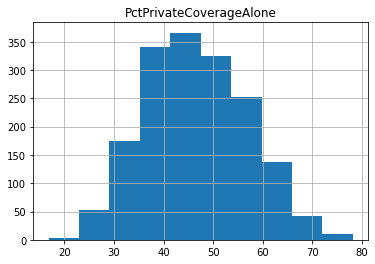

45.5    14
43.3    13
54.4    12
39.5    11
42.8    11
        ..
23.7     1
35.9     1
31.9     1
20.7     1
32.4     1
Name: PctPrivateCoverageAlone, Length: 514, dtype: int64
45.5    0.821114
43.3    0.762463
54.4    0.703812
39.5    0.645161
42.8    0.645161
          ...   
23.7    0.058651
35.9    0.058651
31.9    0.058651
20.7    0.058651
32.4    0.058651
Name: PctPrivateCoverageAlone, Length: 514, dtype: float64


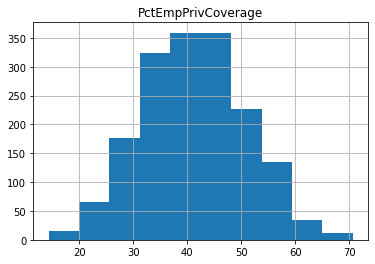

43.7    14
36.3    13
39.4    13
40.0    11
41.3    11
        ..
23.4     1
59.3     1
58.5     1
62.0     1
24.8     1
Name: PctEmpPrivCoverage, Length: 404, dtype: int64
43.7    0.821114
36.3    0.762463
39.4    0.762463
40.0    0.645161
41.3    0.645161
          ...   
23.4    0.058651
59.3    0.058651
58.5    0.058651
62.0    0.058651
24.8    0.058651
Name: PctEmpPrivCoverage, Length: 404, dtype: float64


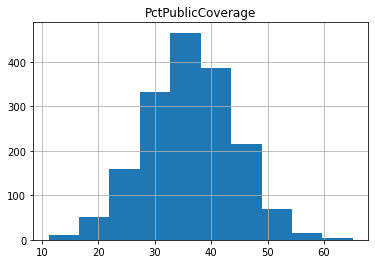

36.2    15
35.3    15
33.4    15
35.1    15
38.7    14
        ..
25.0     1
19.4     1
65.1     1
23.9     1
21.7     1
Name: PctPublicCoverage, Length: 362, dtype: int64
36.2    0.879765
35.3    0.879765
33.4    0.879765
35.1    0.879765
38.7    0.821114
          ...   
25.0    0.058651
19.4    0.058651
65.1    0.058651
23.9    0.058651
21.7    0.058651
Name: PctPublicCoverage, Length: 362, dtype: float64


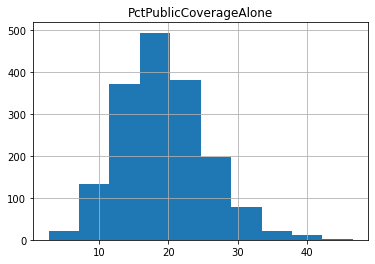

16.8    20
18.7    18
20.2    16
15.5    16
19.8    15
        ..
38.7     1
35.4     1
39.1     1
46.6     1
27.2     1
Name: PctPublicCoverageAlone, Length: 288, dtype: int64
16.8    1.173021
18.7    1.055718
20.2    0.938416
15.5    0.938416
19.8    0.879765
          ...   
38.7    0.058651
35.4    0.058651
39.1    0.058651
46.6    0.058651
27.2    0.058651
Name: PctPublicCoverageAlone, Length: 288, dtype: float64


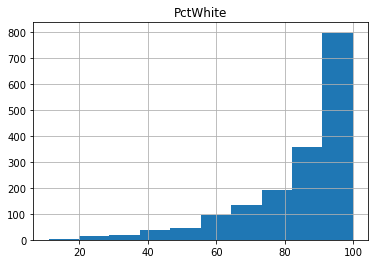

97.087379    2
91.737082    1
88.549909    1
89.192025    1
91.583848    1
            ..
96.075987    1
97.752546    1
74.819902    1
97.029801    1
94.392012    1
Name: PctWhite, Length: 1704, dtype: int64
97.087379    0.117302
91.737082    0.058651
88.549909    0.058651
89.192025    0.058651
91.583848    0.058651
               ...   
96.075987    0.058651
97.752546    0.058651
74.819902    0.058651
97.029801    0.058651
94.392012    0.058651
Name: PctWhite, Length: 1704, dtype: float64


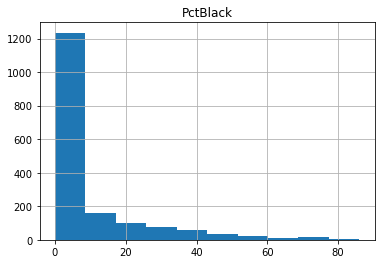

0.000000     36
0.363636      2
2.995578      1
0.245490      1
0.099256      1
             ..
12.156877     1
0.440760      1
10.259009     1
9.366877      1
4.541102      1
Name: PctBlack, Length: 1669, dtype: int64
0.000000     2.111437
0.363636     0.117302
2.995578     0.058651
0.245490     0.058651
0.099256     0.058651
               ...   
12.156877    0.058651
0.440760     0.058651
10.259009    0.058651
9.366877     0.058651
4.541102     0.058651
Name: PctBlack, Length: 1669, dtype: float64


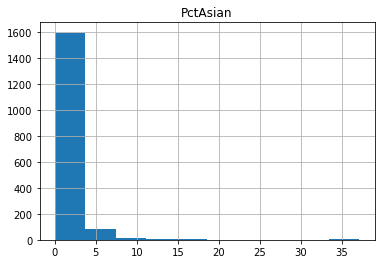

0.000000     110
2.380895       1
0.837139       1
0.193138       1
18.387407      1
            ... 
0.275068       1
0.190916       1
2.808600       1
0.470364       1
1.088506       1
Name: PctAsian, Length: 1596, dtype: int64
0.000000     6.451613
2.380895     0.058651
0.837139     0.058651
0.193138     0.058651
18.387407    0.058651
               ...   
0.275068     0.058651
0.190916     0.058651
2.808600     0.058651
0.470364     0.058651
1.088506     0.058651
Name: PctAsian, Length: 1596, dtype: float64


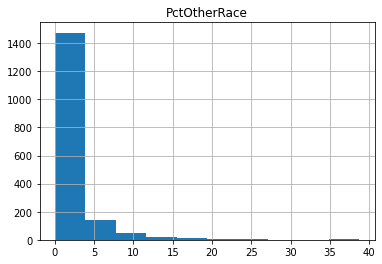

0.000000    85
0.905173     1
2.747358     1
0.248139     1
7.471089     1
            ..
2.523014     1
2.699184     1
2.680101     1
0.769313     1
4.908793     1
Name: PctOtherRace, Length: 1621, dtype: int64
0.000000    4.985337
0.905173    0.058651
2.747358    0.058651
0.248139    0.058651
7.471089    0.058651
              ...   
2.523014    0.058651
2.699184    0.058651
2.680101    0.058651
0.769313    0.058651
4.908793    0.058651
Name: PctOtherRace, Length: 1621, dtype: float64


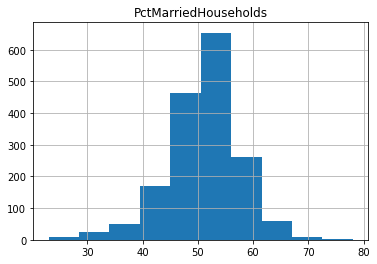

58.578810    1
55.444444    1
51.692308    1
46.250239    1
51.230226    1
            ..
58.220663    1
53.307300    1
51.862650    1
52.419559    1
52.133333    1
Name: PctMarriedHouseholds, Length: 1705, dtype: int64
58.578810    0.058651
55.444444    0.058651
51.692308    0.058651
46.250239    0.058651
51.230226    0.058651
               ...   
58.220663    0.058651
53.307300    0.058651
51.862650    0.058651
52.419559    0.058651
52.133333    0.058651
Name: PctMarriedHouseholds, Length: 1705, dtype: float64


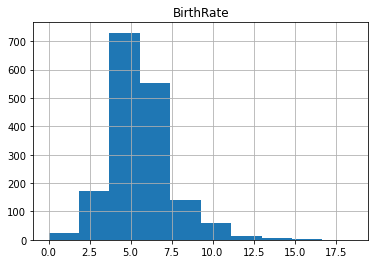

3.095975    2
6.410256    2
6.140351    2
4.664723    2
6.796117    2
           ..
3.482222    1
1.906898    1
5.043114    1
4.425229    1
5.282200    1
Name: BirthRate, Length: 1696, dtype: int64
3.095975    0.117302
6.410256    0.117302
6.140351    0.117302
4.664723    0.117302
6.796117    0.117302
              ...   
3.482222    0.058651
1.906898    0.058651
5.043114    0.058651
4.425229    0.058651
5.282200    0.058651
Name: BirthRate, Length: 1696, dtype: float64


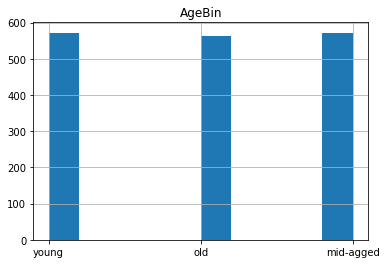

mid-agged    572
young        570
old          563
Name: AgeBin, dtype: int64
mid-agged    33.548387
young        33.431085
old          33.020528
Name: AgeBin, dtype: float64


In [20]:
for col in train.columns:
    train[col].hist().plot()
    plt.title(col)
    plt.show()
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)

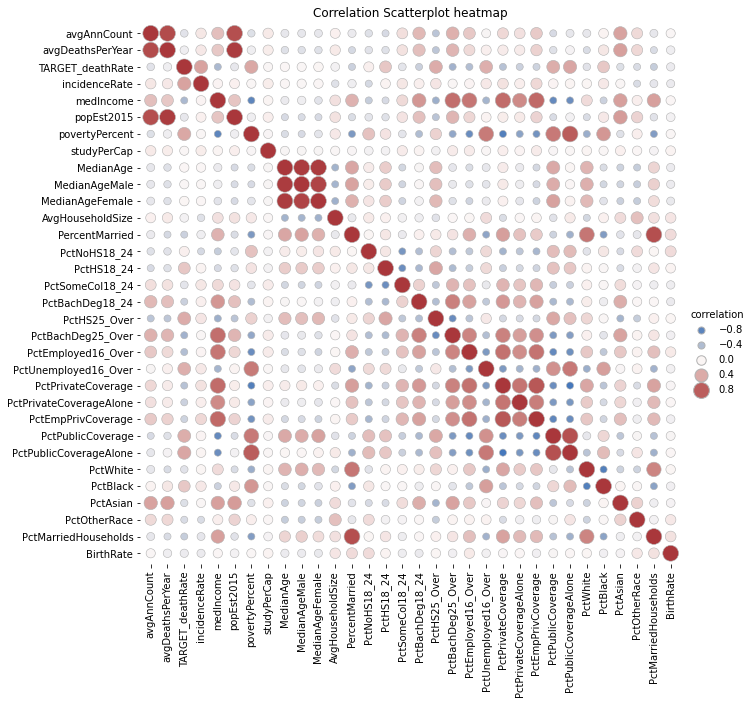

In [21]:
train_corr = train.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=train_corr,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8))
g.set(xlabel="", ylabel="", title='Correlation Scatterplot heatmap', aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

Text(0.5, 1.0, 'There is a positive correlation with Deathrate and Incidence Rate')

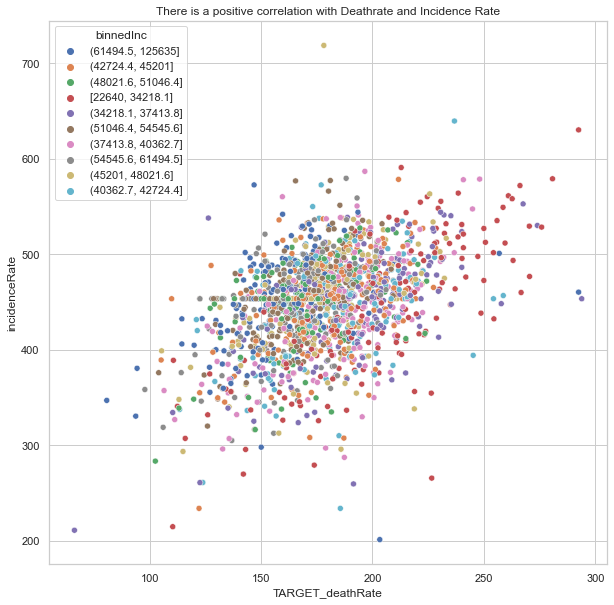

In [165]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='TARGET_deathRate', y='incidenceRate', data=train, hue='binnedInc')
plt.title('There is a positive correlation with Deathrate and Incidence Rate')

In [168]:
corr, p = stats.pearsonr(train.TARGET_deathRate, train.incidenceRate)
print(corr, p)

0.4430537506278721 6.727324186023339e-83


In [169]:
alpha = 0.05
Null = 'There is no relationship between the Deathrate and Incidence Rate.'

Alt = 'There is a relationship between the Deathrate and Incidence Rate.'

if p < alpha:
    print('We reject the null hypothesis that', Null)
    print(Alt)
else:
    print('We fail to reject the null hypothesis that', Null)

We reject the null hypothesis that There is no relationship between the Deathrate and Incidence Rate.
There is a relationship between the Deathrate and Incidence Rate.


<AxesSubplot:xlabel='TARGET_deathRate', ylabel='povertyPercent'>

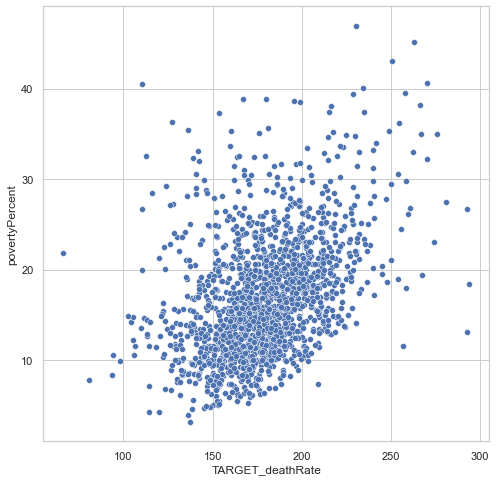

In [174]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='TARGET_deathRate', y='povertyPercent', data=train, palette='green')

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='PctHS18_24'>

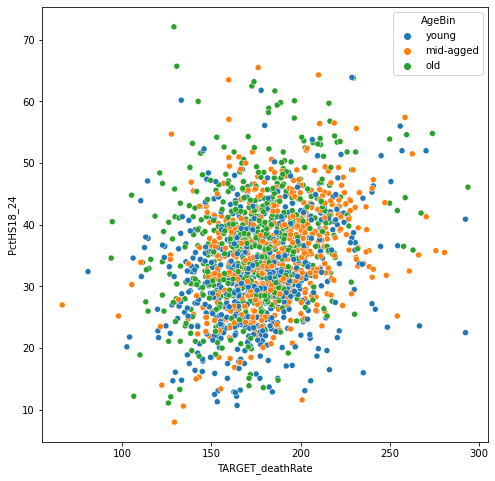

In [34]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='TARGET_deathRate', y='PctHS18_24', data=train, hue='AgeBin')

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='PctHS25_Over'>

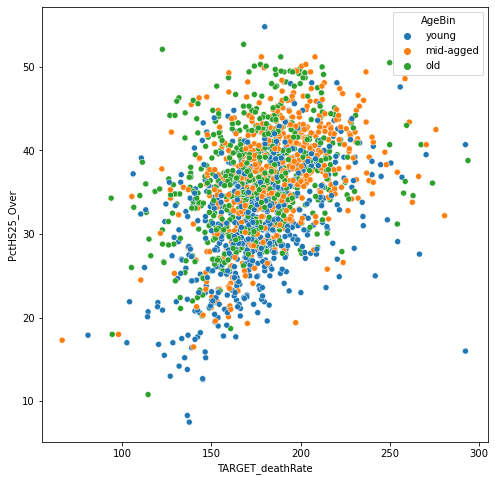

In [35]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='TARGET_deathRate', y='PctHS25_Over', data=train, hue='AgeBin')

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='PctUnemployed16_Over'>

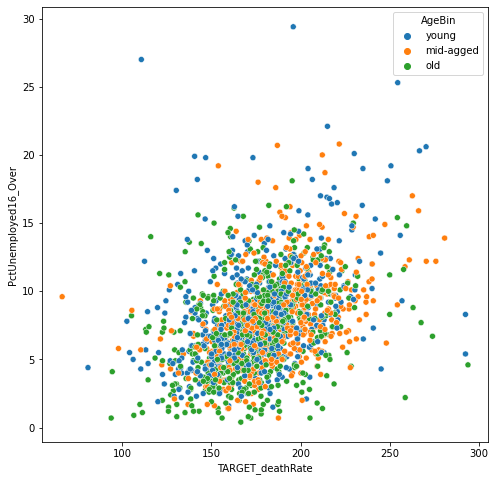

In [36]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='TARGET_deathRate', y='PctUnemployed16_Over', data=train, hue='AgeBin')

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='PctPublicCoverage'>

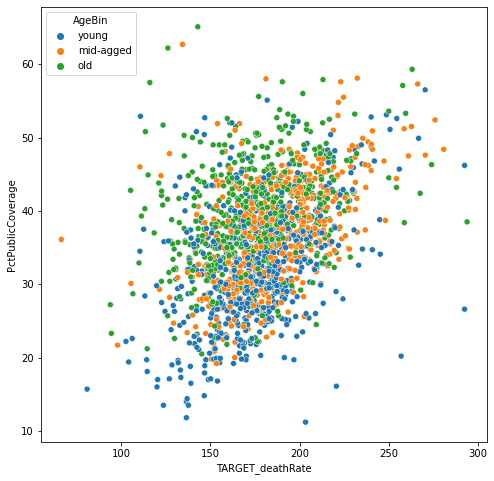

In [37]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='TARGET_deathRate', y='PctPublicCoverage', data=train, hue='AgeBin')

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='PctPublicCoverageAlone'>

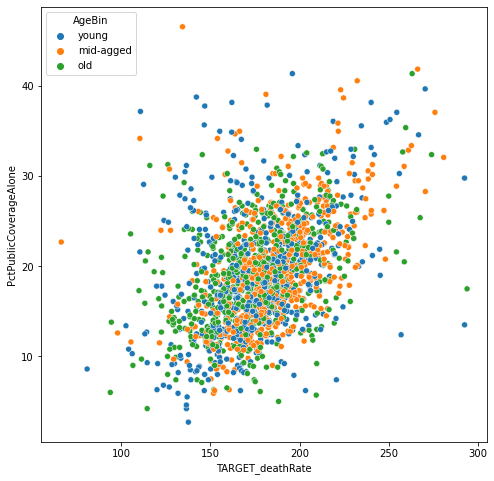

In [38]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='TARGET_deathRate', y='PctPublicCoverageAlone', data=train, hue='AgeBin')

<Figure size 576x576 with 0 Axes>

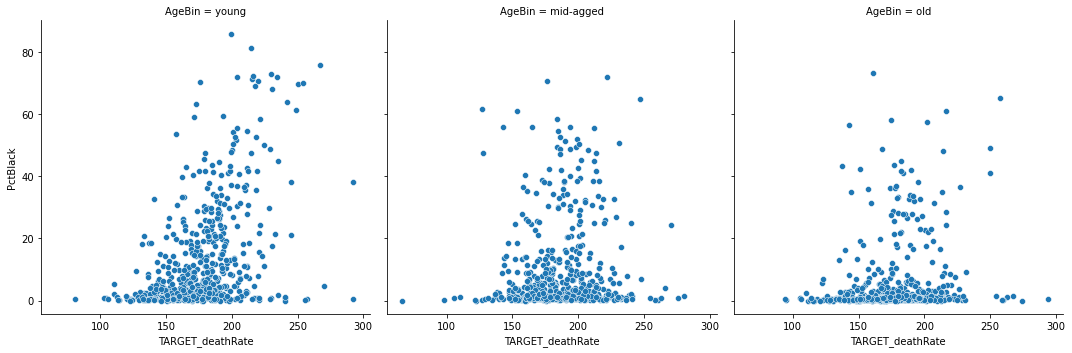

In [41]:
plt.figure(figsize=(8, 8))
sns.relplot(x='TARGET_deathRate', y='PctBlack', data=train, col='AgeBin')

<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Density'>

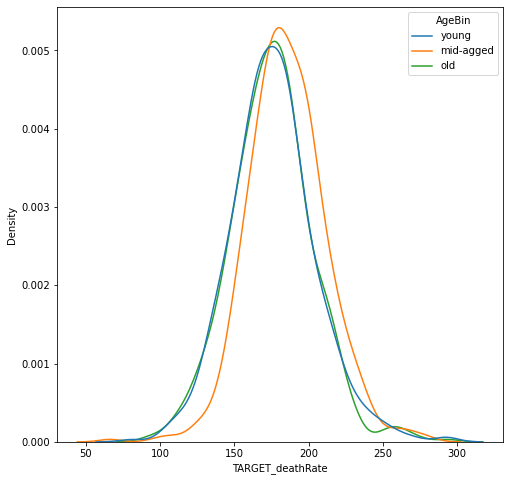

In [43]:
plt.figure(figsize=(8, 8))
sns.kdeplot(data=train, x="TARGET_deathRate", hue="AgeBin")


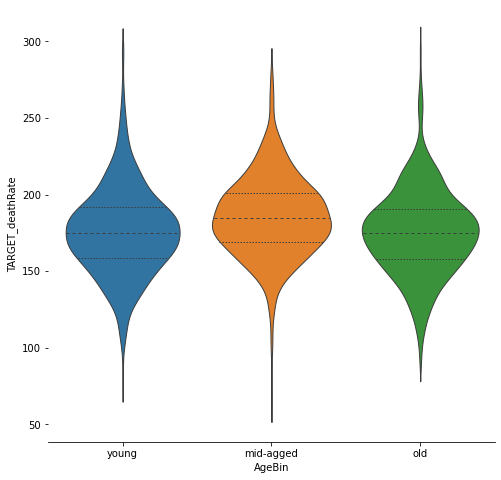

In [146]:
plt.figure(figsize=(8, 8))
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=train, x="AgeBin", y="TARGET_deathRate",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

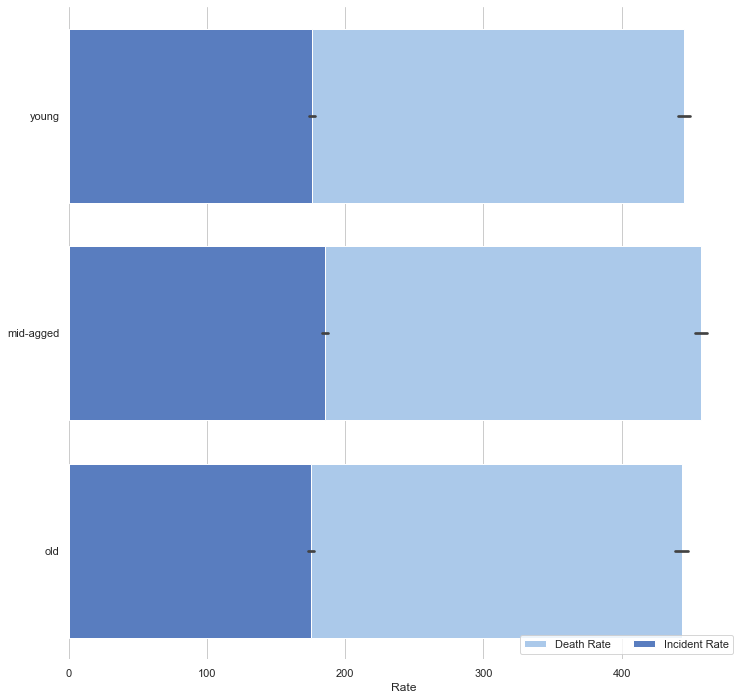

In [159]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="incidenceRate", y="AgeBin", data=train,
            label="Death Rate", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="TARGET_deathRate", y="AgeBin", data=train,
            label="Incident Rate", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Rate")
sns.despine(left=True, bottom=True)

In [45]:
train.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'AgeBin'],
      dtype='object')

In [44]:
def select_kbest(X_train, y_train):
    n = input("How many desired features? ")
    n = int(n)
    f_selector = SelectKBest(f_regression, k=n)
    f_selector.fit(X_train, y_train)
    feature_mask = f_selector.get_support()
    f_feature = X_train.iloc[:,feature_mask].columns.tolist()
    print(f_feature)
    
def rfe(X_train, y_train):
    # initialize the ML algorithm
    lm = LinearRegression()
    
    # input for desired features  
    n = input("How many desired features? ")
    n = int(n)

    # create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
    rfe = RFE(lm, n_features_to_select=n)

    # fit the data using RFE
    rfe.fit(X_train, y_train)  

    # get the mask of the columns selected
    feature_mask = rfe.support_

    # get list of the column names. 
    rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()
    
    # prints the ffe features     
    print(rfe_feature)


In [47]:
def scale_data(train, 
               validate, 
               test, 
               cols = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    #     fit the thing
    scaler.fit(train[cols])
    # applying the scaler:
    train_scaled[cols] = pd.DataFrame(scaler.transform(train[cols]),
                                                  columns=train[cols].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[cols] = pd.DataFrame(scaler.transform(validate[cols]),
                                                  columns=validate[cols].columns.values).set_index([validate.index.values])
    
    test_scaled[cols] = pd.DataFrame(scaler.transform(test[cols]),
                                                 columns=test[cols].columns.values).set_index([test.index.values])
    return train_scaled, validate_scaled, test_scaled

In [52]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [81]:
X_cols = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']
X_train = train_scaled[X_cols]
y_train = train_scaled.TARGET_deathRate

X_validate = validate_scaled[X_cols]
y_validate = validate_scaled.TARGET_deathRate

X_test = test_scaled[X_cols]
y_test = test_scaled.TARGET_deathRate

In [77]:
select_kbest(X_train, y_train)

How many desired features? 6
['incidenceRate', 'medIncome', 'povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctPublicCoverageAlone']


In [78]:
rfe(X_train, y_train)

How many desired features? 6
['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'PctBachDeg25_Over', 'PctMarriedHouseholds']


<hr style="border-top:10px groove PaleTurquoise; margin-top: 2px; margin-bottom: 2px">

In [82]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)
    
# 1. Predict tax_value_pred_mean
TARGET_deathRate_pred_mean = y_train['TARGET_deathRate'].mean()
y_train['TARGET_deathRate_pred_mean'] = TARGET_deathRate_pred_mean
y_validate['TARGET_deathRate_pred_mean'] = TARGET_deathRate_pred_mean

# 2. compute tax_value_pred_median
TARGET_deathRate_pred_median = y_train['TARGET_deathRate'].median()
y_train['TARGET_deathRate_pred_median'] = TARGET_deathRate_pred_median
y_validate['TARGET_deathRate_pred_median'] = TARGET_deathRate_pred_median

# 3. RMSE of tax_value_pred_mean
rmse_train = mean_squared_error(y_train.TARGET_deathRate, y_train.TARGET_deathRate_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.TARGET_deathRate, y_validate.TARGET_deathRate_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of tax_value_pred_median
rmse_train = mean_squared_error(y_train.TARGET_deathRate, y_train.TARGET_deathRate_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.TARGET_deathRate, y_validate.TARGET_deathRate_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  27.83 
Validate/Out-of-Sample:  27.42
RMSE using Median
Train/In-Sample:  27.84 
Validate/Out-of-Sample:  27.44


In [83]:
# Using select k best
X_cols = ['incidenceRate', 'medIncome', 'povertyPercent', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctPublicCoverageAlone']
X_train = train_scaled[X_cols]
y_train = train_scaled.TARGET_deathRate

X_validate = validate_scaled[X_cols]
y_validate = validate_scaled.TARGET_deathRate

X_test = test_scaled[X_cols]
y_test = test_scaled.TARGET_deathRate

In [84]:
def eval_models(y_train, y_validate, X_train, X_validate, X_test, y_test):
    # We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
    y_train = pd.DataFrame(y_train)
    y_validate = pd.DataFrame(y_validate)
    y_test = pd.DataFrame(y_test)

    # create the model object
    lm = LinearRegression(normalize=True)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm.fit(X_train, y_train.TARGET_deathRate)

    # predict train
    y_train['TARGET_deathRate_pred_lm'] = lm.predict(X_train)

    # predict validate
    y_validate['TARGET_deathRate_pred_lm'] = lm.predict(X_validate)

    # Getting rid of the negative predicted value
    replace_lm = y_validate['TARGET_deathRate_pred_lm'].min()
    replace_lm_avg = y_validate['TARGET_deathRate_pred_lm'].mean()
    y_validate['TARGET_deathRate_pred_lm'] = y_validate['TARGET_deathRate_pred_lm'].replace(replace_lm, replace_lm_avg)

    # create the model object
    lars = LassoLars(alpha=1.0)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lars.fit(X_train, y_train.TARGET_deathRate)

    # predict train
    y_train['TARGET_deathRate_pred_lars'] = lars.predict(X_train)

    # predict validate
    y_validate['TARGET_deathRate_pred_lars'] = lars.predict(X_validate)

    # Getting rid of the negative predicted value
    replace_lars = y_validate['TARGET_deathRate_pred_lars'].min()
    replace_lars_avg = y_validate['TARGET_deathRate_pred_lars'].mean()
    y_validate['TARGET_deathRate_pred_lars'] = y_validate['TARGET_deathRate_pred_lars'].replace(replace_lars, replace_lars_avg)

    # make the polynomial features to get a new set of features
    pf = PolynomialFeatures(degree=2)

    # fit and transform X_train_scaled
    X_train_degree2 = pf.fit_transform(X_train)

    # transform X_validate_scaled & X_test_scaled
    X_validate_degree2 = pf.transform(X_validate)
    X_test_degree2 = pf.transform(X_test)

    # create the model object
    lm2 = LinearRegression(normalize=True)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm2.fit(X_train_degree2, y_train.TARGET_deathRate)

    # predict train
    y_train['TARGET_deathRate_pred_lm2'] = lm2.predict(X_train_degree2)

    # predict validate
    y_validate['TARGET_deathRate_pred_lm2'] = lm2.predict(X_validate_degree2)

    # Getting rid of the negative predicted value
    replace_lm2 = y_validate['TARGET_deathRate_pred_lm2'].min()
    replace_lm2_avg = y_validate['TARGET_deathRate_pred_lm2'].mode()
    y_validate['TARGET_deathRate_pred_lm2'] = y_validate['TARGET_deathRate_pred_lm2'].replace(replace_lm2, replace_lm2_avg[0])

    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.TARGET_deathRate, y_train.TARGET_deathRate_pred_lars)**(1/2)
    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.TARGET_deathRate, y_validate.TARGET_deathRate_pred_lars)**(1/2)
    print("RMSE for Lasso + Lars\nTraining/In-Sample: ", round(rmse_train, 2), 
        "\nValidation/Out-of-Sample: ", round(rmse_validate, 2))
    print("R2 Value:", round(r2_score(y_train.TARGET_deathRate, y_train.TARGET_deathRate_pred_lars), 2))
    print('-----------------------------------------------')
    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.TARGET_deathRate, y_train.TARGET_deathRate_pred_lm)**(1/2)
    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.TARGET_deathRate, y_validate.TARGET_deathRate_pred_lm)**(1/2)
    print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train, 2), 
        "\nValidation/Out-of-Sample: ", round(rmse_validate, 2))
    print("R2 Value:", round(r2_score(y_train.TARGET_deathRate, y_train.TARGET_deathRate_pred_lm), 2))
    print('-----------------------------------------------')
    # evaluate: rmse
    rmse_train = mean_squared_error(y_train.TARGET_deathRate, y_train.TARGET_deathRate_pred_lm2)**(1/2)
    # evaluate: rmse
    rmse_validate = mean_squared_error(y_validate.TARGET_deathRate, y_validate.TARGET_deathRate_pred_lm2)**(1/2)
    print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", round(rmse_train, 2), 
        "\nValidation/Out-of-Sample: ", round(rmse_validate, 2))
    print("R2 Value:", round(r2_score(y_train.TARGET_deathRate, y_train.TARGET_deathRate_pred_lm2), 2))

In [74]:
eval_models(y_train, y_validate, X_train, X_validate, X_test, y_test)

RMSE for Lasso + Lars
Training/In-Sample:  27.83 
Validation/Out-of-Sample:  27.42
R2 Value: 0.0
-----------------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  20.46 
Validation/Out-of-Sample:  19.24
R2 Value: 0.46
-----------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  19.6 
Validation/Out-of-Sample:  18.81
R2 Value: 0.5


In [85]:
# Using select rfe
X_cols = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015', 'PctBachDeg25_Over', 'PctMarriedHouseholds']
X_train = train_scaled[X_cols]
y_train = train_scaled.TARGET_deathRate

X_validate = validate_scaled[X_cols]
y_validate = validate_scaled.TARGET_deathRate

X_test = test_scaled[X_cols]
y_test = test_scaled.TARGET_deathRate

In [86]:
eval_models(y_train, y_validate, X_train, X_validate, X_test, y_test)

RMSE for Lasso + Lars
Training/In-Sample:  27.83 
Validation/Out-of-Sample:  27.42
R2 Value: 0.0
-----------------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  20.64 
Validation/Out-of-Sample:  19.67
R2 Value: 0.45
-----------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  20.18 
Validation/Out-of-Sample:  20.71
R2 Value: 0.47


# NOT GOOD ^
# BEST 👇

In [113]:
# Using best judgment
X_cols = ['incidenceRate', 'povertyPercent', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctPublicCoverageAlone', 'PctHS18_24', 'PctUnemployed16_Over',
         'PctPublicCoverage']
X_train = train_scaled[X_cols]
y_train = train_scaled.TARGET_deathRate

X_validate = validate_scaled[X_cols]
y_validate = validate_scaled.TARGET_deathRate

X_test = test_scaled[X_cols]
y_test = test_scaled.TARGET_deathRate

In [114]:
eval_models(y_train, y_validate, X_train, X_validate, X_test, y_test)

RMSE for Lasso + Lars
Training/In-Sample:  27.83 
Validation/Out-of-Sample:  27.42
R2 Value: 0.0
-----------------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  20.25 
Validation/Out-of-Sample:  18.96
R2 Value: 0.47
-----------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  19.11 
Validation/Out-of-Sample:  19.14
R2 Value: 0.53


In [121]:
def train_model(y_test, X_train, X_test, y_train):
    # We need y_test to be a dataframe 
    y_test = pd.DataFrame(y_test)
    y_train = pd.DataFrame(y_train)

    # create the model object
    lm = LinearRegression(normalize=True)

    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm.fit(X_train, y_train.TARGET_deathRate)

    # predict train
    y_train['TARGET_deathRate_pred_lm'] = lm.predict(X_train)

    # predict test
    y_test['TARGET_deathRate_pred_lm'] = lm.predict(X_test)

    # Getting rid of the negative predicted value
    replace_lm = y_test['TARGET_deathRate_pred_lm'].min()
    replace_lm_avg = y_test['TARGET_deathRate_pred_lm'].mean()
    y_test['TARGET_deathRate_pred_lm'] = y_test['TARGET_deathRate_pred_lm'].replace(replace_lm, replace_lm_avg)
    
    
    rmse_test = mean_squared_error(y_test.TARGET_deathRate, y_test.TARGET_deathRate_pred_lm)**(1/2)
    print("RMSE for OLS using Linear Regression, degrees=2\nTest/Out-of-Sample: ", round(rmse_test, 2))

In [122]:
train_model(y_test, X_train, X_test, y_train)

RMSE for OLS using Linear Regression, degrees=2
Test/Out-of-Sample:  20.67


In [123]:
def train_model(y_test, X_train, X_test, y_train):
    # We need y_test to be a dataframe 
    y_test = pd.DataFrame(y_test)
    y_train = pd.DataFrame(y_train)

    # create the model object
    pf = PolynomialFeatures(degree=2)

    # fit and transform X_train_scaled
    X_train_degree2 = pf.fit_transform(X_train)
    
    # transform X_test    
    X_test_degree2 = pf.transform(X_test)
    
    # create the model object
    lm2 = LinearRegression(normalize=True)

    
    # fit the model to our training data. We must specify the column in y_train, 
    # since we have converted it to a dataframe from a series! 
    lm2.fit(X_train_degree2, y_train.TARGET_deathRate)
    
    # predict test
    y_test['TARGET_deathRate_pred_lm2'] = lm2.predict(X_test_degree2)
    
    rmse_test = mean_squared_error(y_test.TARGET_deathRate, y_test.TARGET_deathRate_pred_lm2)**(1/2)
    print("RMSE for Polynomial Model, degrees=2\nTest/Out-of-Sample: ", round(rmse_test, 2))

In [124]:
train_model(y_test, X_train, X_test, y_train)

RMSE for Polynomial Model, degrees=2
Test/Out-of-Sample:  20.49
